In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time

from pbil import pbil
from pbil_weighted import pbil_weighted

# OneMax

In [2]:
def score_one_max(P):
    return P.sum(axis=1)

In [7]:
num_iter = 1000

t0 = time.time()
s, log, _ = pbil(100, score_one_max, 125, .04, .05, .01,  num_iter)
print time.time() - t0

1.05588698387


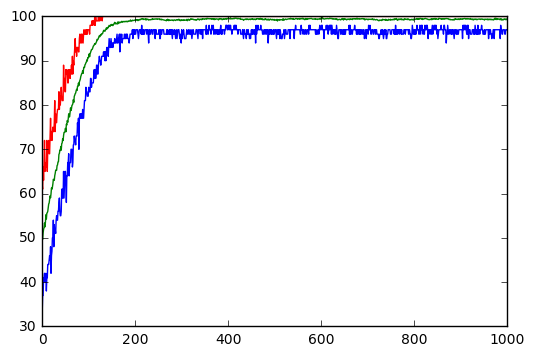

In [8]:
plt.plot(xrange(num_iter), log)
plt.show()

# Deceptive OneMax

In [9]:
def score_deceptive_one_max(P):
    s = P.sum(axis=1) - 1
    s[s == -1] = P.shape[1]
    return s

In [13]:
num_iter = 1000

t0 = time.time()
s, log, _ = pbil(100, score_deceptive_one_max, 125, .04, .05, .01,  num_iter)
print time.time() - t0

1.5889570713


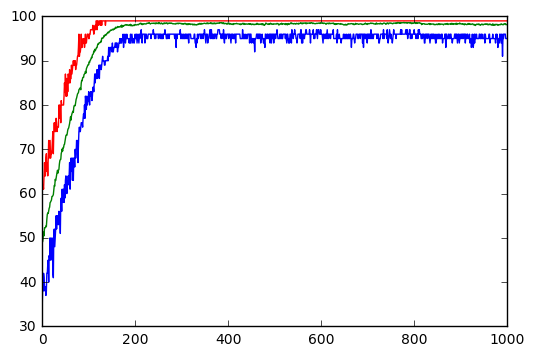

In [14]:
plt.plot(xrange(num_iter), log)
plt.show()

# K-Deceptive OneMax

In [15]:
def score_K_deceptive_one_max(P, K):
    assert not P.shape[1] % K
    s = P.reshape((P.shape[0], K, -1)).sum(axis=2) - 1
    s[s == -1] = P.shape[1] / K
    return s.sum(axis=1)

In [16]:
num_iter = 1000

score_fn = lambda P: score_K_deceptive_one_max(P, 10)

t0 = time.time()
s, log, _ = pbil(100, score_fn, 125, .04, .05, .01, num_iter)
print time.time() - t0

1.06924700737


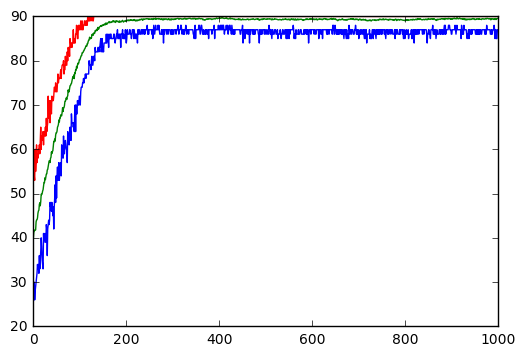

In [17]:
plt.plot(xrange(num_iter), log)
plt.show()

# zad2

In [2]:
from scipy.stats import mode

data_path = 'data/'

rules = np.loadtxt(data_path + 'ClassificationRules.txt')
ys = np.loadtxt(data_path + 'ImageExpertReduced.txt')
xs = np.loadtxt(data_path + 'ImageRawReduced.txt')

In [3]:
ones = rules == 1
twos = rules == 2
threes = rules == 3

In [4]:
def classification_score(P):
    y1 = P.dot(ones)[:, :, np.newaxis]
    y2 = P.dot(twos)[:, :, np.newaxis]
    y3 = P.dot(threes)[:, :, np.newaxis]
    Ys = np.concatenate([y1, y2, y3], axis=2).argmax(axis=2) + 1
    return (Ys == ys).sum(axis=1).astype(np.float32) / ys.size

In [5]:
num_iter = 1000

t0 = time.time()
s, log, p = pbil(rules.shape[0], classification_score, 50, .05, .05, .01, num_iter, True)
print time.time() - t0

Starting iteration 1 out of 1000...
Current population stats: 	0.774, 	0.849, 	0.933
Starting iteration 2 out of 1000...
Current population stats: 	0.788, 	0.860, 	0.917
Starting iteration 3 out of 1000...
Current population stats: 	0.795, 	0.859, 	0.944
Starting iteration 4 out of 1000...
Current population stats: 	0.786, 	0.865, 	0.921
Starting iteration 5 out of 1000...
Current population stats: 	0.794, 	0.872, 	0.945
Starting iteration 6 out of 1000...
Current population stats: 	0.795, 	0.872, 	0.952
Starting iteration 7 out of 1000...
Current population stats: 	0.796, 	0.875, 	0.934
Starting iteration 8 out of 1000...
Current population stats: 	0.799, 	0.878, 	0.938
Starting iteration 9 out of 1000...
Current population stats: 	0.827, 	0.889, 	0.951
Starting iteration 10 out of 1000...
Current population stats: 	0.842, 	0.893, 	0.941
Starting iteration 11 out of 1000...
Current population stats: 	0.787, 	0.892, 	0.942
Starting iteration 12 out of 1000...
Current population stats: 

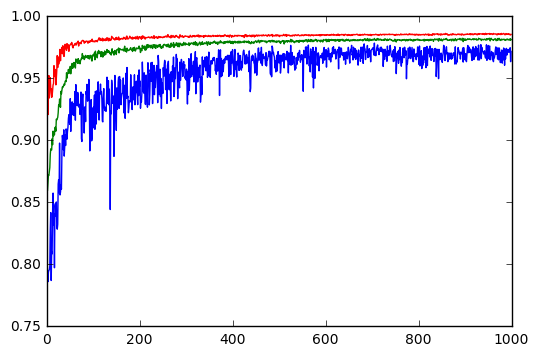

In [8]:
plt.plot(xrange(num_iter), log)
plt.show()

In [12]:
num_iter = 1500

t0 = time.time()
s, log, p = pbil_weighted(rules.shape[0], classification_score, 50, .05, .05, .01, 
                          num_iter, sigma=.1, logging=True)
print time.time() - t0

Starting iteration 1 out of 1500...
Current population stats: 	0.843, 	0.852, 	0.859
Starting iteration 2 out of 1500...
Current population stats: 	0.844, 	0.852, 	0.859
Starting iteration 3 out of 1500...
Current population stats: 	0.841, 	0.852, 	0.860
Starting iteration 4 out of 1500...
Current population stats: 	0.845, 	0.852, 	0.861
Starting iteration 5 out of 1500...
Current population stats: 	0.845, 	0.853, 	0.861
Starting iteration 6 out of 1500...
Current population stats: 	0.845, 	0.853, 	0.861
Starting iteration 7 out of 1500...
Current population stats: 	0.846, 	0.853, 	0.861
Starting iteration 8 out of 1500...
Current population stats: 	0.847, 	0.854, 	0.867
Starting iteration 9 out of 1500...
Current population stats: 	0.846, 	0.854, 	0.864
Starting iteration 10 out of 1500...
Current population stats: 	0.847, 	0.855, 	0.864
Starting iteration 11 out of 1500...
Current population stats: 	0.846, 	0.855, 	0.864
Starting iteration 12 out of 1500...
Current population stats: 

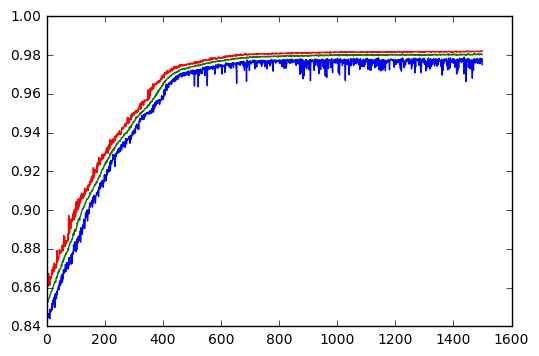

In [13]:
plt.plot(xrange(num_iter), log)
plt.show()